<div style="border:solid green 2px; padding: 20px">
<b>Hi, Evgeniy!</b>

It's Grigoriy, I've reviewed your previous projects. I hope you didn't tired of me :)

As usual, you can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='orange'>orange</font> boxes like this:

<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

    
Let's work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track the changes if you highlight your comments:
    
<div class="alert alert-info"> <b>Student's comment:</b> For example like this.</div>

### <font color='orange'>General feedback</font>
Thank you for submitting your project. I can see that you've worked really hard on it! Sorry, but your project is not quite ready for review. The code doesn’t run because of errors, we have a problem with plotly express version. You can bypass this issue if you swith from px.funnel to the go.funnel. Please, check this link:<a>https://plotly.com/python/funnel-charts/</a>

<div class="alert alert-info"> 
Hello again Grigory!  
    
I've isnerted this line in the first cell and after restarting the kernel it helped <b> ! pip install -q --user 'plotly == 4.9.0'  
 Hope it will work now   </b></div>
 
Unfortunately, it doesn't work :( I tried to install or update plotly on the platform side, but I didn't succeed and ended up with that go.funnel object solution. But I check your code, it's absolutely correct. So, I've just comment out it.

**Update**:<br>
Thank you for the update! This time I was able to check your work completely and I am glad to say that it is very good! The question arose only in one place because of the hardcoded values usage. Also, I answered you about the problem with funnel plot calculations.

**Upate**:<br>
Thank you for taking the time to correct your project! I really appreciate your hard work. The last problem left is related to "hardcoded constants". I have left you an explanation below.

**Update**:<br>
Your project has been accepted, congratulation!

# Integrated project 2 - by Evgeniy

You work at a startup that sells food products. You need to investigate user behavior for the company's app.First study the sales funnel. Find out how users reach the purchase stage. How many users actually make it to this stage? How many get stuck at previous stages? Which stages in particular?Then look at the results of an A/A/B test. (Read on for more information about A/A/B testing.) The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test.The users are split into three groups: two control groups get the old fonts and one test group gets the new ones. Find out which set of fonts produces better results.Creating two A groups has certain advantages. We can make it a principle that we will only be confident in the accuracy of our testing when the two control groups are similar. If there are significant differences between the A groups, this can help us uncover factors that may be distorting the results. Comparing control groups also tells us how much time anddata we'll need when running further tests.You'll be using the same dataset for general analytics and for A/A/B analysis. In real projects, experiments are constantly being conducted. Analysts study the quality of an app using general data, without paying attention to whether users are participating in experiments.

# Step 1. Open the data file and read the general information

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import plotly.express as px

! pip install -q --user 'plotly == 4.12.0'

from scipy import stats as st
import numpy as np
import math as mth

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')
df.info()
df.columns = ['event_name', 'user_id', 'timestamp', 'experiment_id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [3]:
df.head()

,event_name,user_id,timestamp,experiment_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


### Conclusion  
We've imported the data.

# Step 2. Prepare the data for analysis

* Add a date and time column and a separate column for dates
* Check for missing values and data types. Correct the data if needed

In [4]:
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
df.head()

,event_name,user_id,timestamp,experiment_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [5]:
df['event_name'].unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

Now let's check for **duplicated** values.

We got 413 duplicates. Let's check their time.

In [6]:
df[df.duplicated()]

,event_name,user_id,timestamp,experiment_id
453,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248
2350,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248
3573,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248
4076,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247
4803,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248
...,...,...,...,...
242329,MainScreenAppear,8870358373313968633,2019-08-07 19:26:44,247
242332,PaymentScreenSuccessful,4718002964983105693,2019-08-07 19:26:45,247
242360,PaymentScreenSuccessful,2382591782303281935,2019-08-07 19:27:29,246
242362,CartScreenAppear,2382591782303281935,2019-08-07 19:27:29,246


In [7]:
for i in df[df.duplicated()].columns:
    print(i,':', df[df.duplicated()][i].nunique())

event_name : 5
user_id : 237
timestamp : 352
experiment_id : 3


This means we got duplicates in all 5 events and all 3 groups. Let's look at the time.

In [8]:
df[df.duplicated()]['timestamp'].dt.date.unique()

array([datetime.date(2019, 7, 30), datetime.date(2019, 7, 31),
       datetime.date(2019, 8, 1), datetime.date(2019, 8, 2),
       datetime.date(2019, 8, 3), datetime.date(2019, 8, 4),
       datetime.date(2019, 8, 5), datetime.date(2019, 8, 6),
       datetime.date(2019, 8, 7)], dtype=object)

In [9]:
df['timestamp'].describe()

count                  244126
unique                 176654
top       2019-08-04 16:23:19
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: timestamp, dtype: object

Uh-oh, seems like we got duplicates for 8 days out of 14 day experiment.  
However we still have to **drop** them since there are not plenty options around.

In [10]:
df = df.drop_duplicates().reset_index(drop=True)
df.tail()

,event_name,user_id,timestamp,experiment_id
243708,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
243709,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
243710,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
243711,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246
243712,OffersScreenAppear,5746969938801999050,2019-08-07 21:15:17,246


## Coclusion.
We've prepared the data for analysis by removing duplicates and formatting rows.

<div class="alert alert-success">
<b>Reviewer's comment: </b> Good job!
</div>

# Step 3. Study and check the data

* How many events are in the logs?
* How many users are in the logs?
* What's the average number of events per user?
* What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?
* Did you lose many events and users when excluding the older data?•Make sure you have users from all three experimental groups.

### How many events are in the logs?

In [11]:
print(df.event_name.unique())
print(df.event_name.nunique())

['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
5


There are **5** events.

### How many users are in the logs?

In [12]:
print('The amount of unique users is:',df['user_id'].nunique())

The amount of unique users is: 7551


The amount of unique users is: **7551**.


### What's the average number of events per user?

In [13]:
(df['event_name'].count()/df['user_id'].nunique()).round()

32.0

The average number of events per user is **32**.

In [14]:
df.groupby('user_id')['event_name'].nunique().reset_index().groupby('event_name')['user_id'].nunique()

event_name
1    2707
2    1021
3     317
4    3035
5     471
Name: user_id, dtype: int64

From this we can see that only **3035** users out of 7551 got to screen #4 - **payment succesfull**.

### What period of time does the data cover?

In [15]:
df['timestamp'].describe()

count                  243713
unique                 176654
top       2019-08-01 14:40:35
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: timestamp, dtype: object

It covers about 2 weeks.  
First : 2019-07-25  
Last  : 2019-08-08

### What period does the data actually represent?

In [16]:
df['date'] = df['timestamp'].dt.date

In [17]:
event_per_date = df.groupby('date')['event_name'].count().reset_index()
event_per_date

,date,event_name
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184
5,2019-07-30,412
6,2019-07-31,2030
7,2019-08-01,36141
8,2019-08-02,35554
9,2019-08-03,33282


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



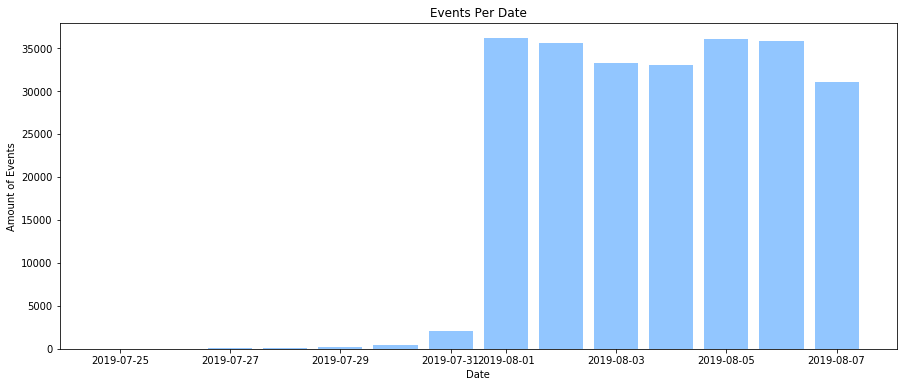

In [18]:
fig = plt.figure(figsize = (15, 6))  

with plt.style.context('seaborn-pastel'):
    plt.bar(event_per_date['date'], event_per_date['event_name'])
    
plt.xlabel("Date") 
plt.ylabel("Amount of Events") 
plt.title("Events Per Date") 
plt.show()     
    


By looking at this graph we can definitely say that data represents the **period of 1 week** - from 01-08-2019 till 07-08-2019.

Let's exclude the **older** data.

In [19]:
df_filtered = df[(df['date'] > pd.to_datetime('2019-07-31').date()) & (df['date'] < pd.to_datetime('2019-08-08').date())]

In [20]:
df_filtered

,event_name,user_id,timestamp,experiment_id,date
2826,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
2827,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2828,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
2829,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
2830,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01
...,...,...,...,...,...
243708,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
243709,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
243710,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
243711,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


### Did you lose many events and users when excluding the older data?

In [21]:
print('Number of users in filtered DataFrame is:',df_filtered['user_id'].nunique())
print('Number of users in old DataFrame is:',df['user_id'].nunique())
print('Percentage of users lost:', df_filtered['user_id'].nunique()/df['user_id'].nunique() - 1)

Number of users in filtered DataFrame is: 7534
Number of users in old DataFrame is: 7551
Percentage of users lost: -0.0022513574361011646


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small hint: you can format percentage values as actual percents with format() function: <code>print('{:.2%}'.format())</code>
</div>

We can see that the amount of users lost wasn't critical.  
Let's have a look at the events.

In [22]:
print('Number of events in filtered DataFrame is:',df_filtered['event_name'].count())
print('Number of events in old DataFrame is:',df['event_name'].count())
print('Percentage of events lost:', df_filtered['event_name'].count()/df['event_name'].count() - 1)

Number of events in filtered DataFrame is: 240887
Number of events in old DataFrame is: 243713
Percentage of events lost: -0.01159560630741896


Not much of a value was lost.

### Make sure you have users from all three experimental groups.

In [23]:
df_filtered.experiment_id.value_counts()

248    84563
246    79302
247    77022
Name: experiment_id, dtype: int64

In [24]:
df_filtered.groupby('experiment_id')['user_id'].nunique()

experiment_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

We can see that we have **2484** and **2517** users in A and A groups respectively and **2537** users in B group.

## Conclusion.

In this part we've figured several points:
* There are **5** events.
* The amount of unique users in original data is: **7551** and in filtered - **7538**
* The average number of events per user is **32**.
* Data covers about 2 weeks. First : 2019-07-25 Last  : 2019-08-08
* By looking at this graph we can definitely say that data represents the **period of 1 week** - from 01-08-2019 till 07-08-2019.
* We can see that we have **2484** and **2517** users in A and A groups respectively and **2537** users in B group.


<div class="alert alert-success">
<b>Reviewer's comment: </b> Excellent, all calculations are right!
</div>

# Step 4. Study the event funnel.

### See what events are in the logs and their frequency of occurrence. Sort them by frequency.

In [25]:
df_filtered.groupby('event_name')['user_id'].count().reset_index().sort_values('user_id', ascending=False)


,event_name,user_id
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


Text(0, 0.5, 'Type of Event')

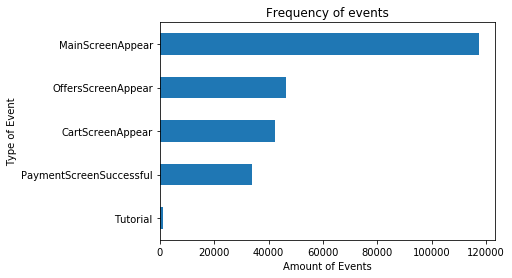

In [26]:
df_filtered.groupby('event_name')['user_id'].count().sort_values(ascending=True).plot.barh(title='Frequency of events') #(kind='bar')
plt.xlabel('Amount of Events')
plt.ylabel('Type of Event')


<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small hint: you can hide text above the plot with <code>plt.show()</code>.
</div>

### Find the number of users who performed each of these actions.

There are two options for this task.

In [27]:
df_filtered.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)/df_filtered.user_id.nunique()

event_name
MainScreenAppear           0.984736
OffersScreenAppear         0.609636
CartScreenAppear           0.495620
PaymentScreenSuccessful    0.469737
Tutorial                   0.111495
Name: user_id, dtype: float64

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Small hint: you can format ratio values as actual percentages: <a>https://stackoverflow.com/a/36175424/11664121</a>. In this case you will alter only a dataframe formatting rules, but not data.
</div>

Option #2

In [28]:
at_least_once = df_filtered.groupby(['user_id','event_name'])['timestamp'].count().reset_index()
at_least_once.head()

,user_id,event_name,timestamp
0,6888746892508752,MainScreenAppear,1
1,6909561520679493,CartScreenAppear,1
2,6909561520679493,MainScreenAppear,2
3,6909561520679493,OffersScreenAppear,1
4,6909561520679493,PaymentScreenSuccessful,1


In [29]:
at_least_once[at_least_once.timestamp > 1].groupby('event_name')['user_id'].nunique().sort_values(ascending=False)/df_filtered.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)

event_name
MainScreenAppear           0.966842
OffersScreenAppear         0.851731
CartScreenAppear           0.873594
PaymentScreenSuccessful    0.837807
Tutorial                   0.100000
Name: user_id, dtype: float64

Numbers above show how many users have **returned** and repeated the same behavior **more than once**.  
**~84%** for payment is a very good number.

### In what order do you think the actions took place. Are all of them part of a single sequence?

According to this table over here:

In [30]:
df_filtered.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)/df_filtered.user_id.nunique()

event_name
MainScreenAppear           0.984736
OffersScreenAppear         0.609636
CartScreenAppear           0.495620
PaymentScreenSuccessful    0.469737
Tutorial                   0.111495
Name: user_id, dtype: float64

We may conclude that there are two separate sequences.  
1. **Main Screen Appear >>> Offers Screen Appear >>> CartScreenAppear >>> Payment Screen Successful**
2. **Tutorial**

<div class="alert alert-success">
<b>Reviewer's comment: </b> Yes, we can skip Tutorial from  the funnel. 
</div>

### Use the event funnel to find the share of users that proceed from each stage to the next. 

In [31]:
funnel_shift = df_filtered.groupby('event_name')['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)
funnel_shift

,event_name,user_id
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


In [32]:
funnel_shift = funnel_shift.head(4)

<div class="alert alert-danger">
<s><b>Reviewer's comment:</b> Please, pay attention that you store the Tutoral stage in the funnel dataframe.
</div>

<div class="alert alert-info"> <b>Student's comment:</b> I did pay attention and figure out that it's from a separate sequence in conclusions.</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment v2:</b> And I saw that and I praised you for that. <br>   
The problem is that the presence of the Tutorial in the calculations distorts the research perception and create a false funnel picture. More over, graphs and tables from analytical notebooks are often used in presentations where there is no code or any technical context.
</div>

<div class="alert alert-info"> <b>Student's comment v2:</b> Got it. Fixed.</div>

In [33]:
funnel_shift['perc_ch'] = funnel_shift.user_id.pct_change()
funnel_shift

,event_name,user_id,perc_ch
1,MainScreenAppear,7419,NaN
2,OffersScreenAppear,4593,-0.380914
0,CartScreenAppear,3734,-0.187024
3,PaymentScreenSuccessful,3539,-0.052223


In [34]:
funnel_by_groups = []
for i in df_filtered.experiment_id.unique():
    group=df_filtered[df_filtered.experiment_id == i].groupby(['event_name', 'experiment_id'])['user_id'].nunique().reset_index()\
    .sort_values(by='user_id', ascending=False)
    display(group)
    funnel_by_groups.append(group)

,event_name,experiment_id,user_id
1,MainScreenAppear,246,2450
2,OffersScreenAppear,246,1542
0,CartScreenAppear,246,1266
3,PaymentScreenSuccessful,246,1200
4,Tutorial,246,278


,event_name,experiment_id,user_id
1,MainScreenAppear,247,2476
2,OffersScreenAppear,247,1520
0,CartScreenAppear,247,1238
3,PaymentScreenSuccessful,247,1158
4,Tutorial,247,283


,event_name,experiment_id,user_id
1,MainScreenAppear,248,2493
2,OffersScreenAppear,248,1531
0,CartScreenAppear,248,1230
3,PaymentScreenSuccessful,248,1181
4,Tutorial,248,279


In [35]:
funnel_by_groups = pd.concat(funnel_by_groups)


In [36]:
funnel_by_groups

,event_name,experiment_id,user_id
1,MainScreenAppear,246,2450
2,OffersScreenAppear,246,1542
0,CartScreenAppear,246,1266
3,PaymentScreenSuccessful,246,1200
4,Tutorial,246,278
1,MainScreenAppear,247,2476
2,OffersScreenAppear,247,1520
0,CartScreenAppear,247,1238
3,PaymentScreenSuccessful,247,1158
4,Tutorial,247,283


In [37]:
funnel_by_groups = funnel_by_groups.query('event_name != "Tutorial"')

In [38]:
#fig = px.funnel(funnel_by_groups, x='user_id', y='event_name', color='experiment_id')
#fig.show()

We can see the funnel here. It also includes tutorial which is **not** a part of this funned, since it's a **separate** action.

### At what stage do you lose the most users?

Right awat by looking at the funnel we can say that most users are left behind right after **Main Screen Appear** behavior and before offers.

### What share of users make the entire journey from their first event to payment?
To asnwer this question we will use the same calculations from above. 

In [39]:
df_filtered.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)/df_filtered.user_id.nunique()

event_name
MainScreenAppear           0.984736
OffersScreenAppear         0.609636
CartScreenAppear           0.495620
PaymentScreenSuccessful    0.469737
Tutorial                   0.111495
Name: user_id, dtype: float64

We can see that **~46%** of users got to the Payment stage.

## Conclusion.
In this step we've studied the event funnel:
* We figured the frequency of events.
* We figured how many users have returned and repeated the same behavior more than once. ~84% for payment is a very good number.  
* Right awat by looking at the funnel we can say that most users are left behind right after **Main Screen Appear** behavior and before offers.
* We can see that **~46%** of users got to the Payment stage.

We figured that there are 2 sequences:
* Main Screen Appear >>> Offers Screen Appear >>> CartScreenAppear >>> Payment Screen Successful
* Tutorial


<div class="alert alert-success">
<b>Reviewer's comment v2: </b> Good!
</div>

____
____
____

# Step 5. Study the results of the experiment

### How many users are there in each group?

In [40]:
df_filtered.groupby('experiment_id')['user_id'].nunique()

experiment_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64

**2484, 2517 and 2537** in groups A, A and B.

### See if there is a statistically significant difference between samples 246 and 247.

We will answer this 2 questions below.

### Select the most popular event. In each of the control groups, find the number of users who performed this action.

We've already done that in the funnel question above and came to a conclusion that **MainScreenAppear** is the most popular event. Below is the amount of users in each of the groups.

In [41]:
funnel_by_groups[funnel_by_groups['event_name'] == 'MainScreenAppear']

,event_name,experiment_id,user_id
1,MainScreenAppear,246,2450
1,MainScreenAppear,247,2476
1,MainScreenAppear,248,2493


###  Check whether the difference between the groups is statistically significant.

To do this, we need to use the test of proportions or z-score. We have an example from theory:

<div class="alert alert-danger">
<b>Reviewer's comment:</b> Please, don't use hardcoded constants.
</div>

    
<div class="alert alert-info"> <b>Student's comment:</b> I'm not sure what did you mean by that... Below was just an example from theory that I've suited to my needs afterwards. Anyway I've commented it out but still I'd be glad if you could elaborate on what "Hardoced constants" mean:) Thank you in advance!</div>

<div class="alert alert-warning">
<b>Reviewer's comment v2: </b> Sure. You use successes and trials values from previous calculations, but you just type some numbers. Instead of it, you should get them as variables linked from previous code. Please, update your code.
</div>

    
<div class="alert alert-info"> <b>Student's comment v3:</b> But I used random numbers only in this example from theory... In code below I didn't use them at all that's why in the first place I didn't understand what you mean...  
Maybe I'm not understanding you right, can you please specify where are those?</div>

<div class="alert alert-warning">
<b>Reviewer's comment v3: </b> I thought that you used real numbers from some funnel stage :) Okay, thank you for the clarification.
</div>

In [42]:

##alpha = .05 # significance level

##successes = np.array([78, 120])
##trials = np.array([830, 909])

# success proportion in the first group:
##p1 = successes[0]/trials[0]

# success proportion in the second group:
##p2 = successes[1]/trials[1]

# success proportion in the combined dataset:
##p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# the difference between the datasets' proportions
##difference = p1 - p2
# calculating the statistic in standard deviations of the standard normal distribution
##z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
##distr = st.norm(0, 1)
# calculating the statistic in standard deviations of the standard normal distribution
##z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# setting up the standard normal distribution (mean 0, standard deviation 1)
##distr = st.norm(0, 1) 

##p_value = (1 - distr.cdf(abs(z_value))) * 2

##print('p-value: ', p_value)

##if (p_value < alpha):
##    print("Rejecting the null hypothesis: there is a significant difference between the proportions")
##else:
##    print("Failed to reject the null hypothesis: there is no reason to consider the proportions different")

**Trials** would be the amount of unique users in the control group.  
**Successes** is the amount of users from the same control group that saw the certain event.

Let's make a pivot table with amount of users per group per event.

In [43]:
pivot = df_filtered.pivot_table(index='event_name', values='user_id', columns='experiment_id', aggfunc={'user_id':'nunique'}).reset_index()
pivot

experiment_id,event_name,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


Now let's get 'MainScreenAppear' from the group 247.

In [44]:
pivot[pivot.event_name == 'MainScreenAppear'][247][1]

2476

Voila! Now we better automatize it

In [45]:
def check_hypothesis(group1, group2, event, alpha):
    sucesses1 = pivot[pivot.event_name == event][group1].iloc[0]
    sucesses2 = pivot[pivot.event_name == event][group2].iloc[0]
    print("Successes for group", group1, "are", sucesses1, "for event", event,"\n",
         "and successes for group", group2, "are", sucesses2, "for event", event)

In [46]:
check_hypothesis(246, 247, 'MainScreenAppear', 0.05)

Successes for group 246 are 2450 for event MainScreenAppear 
 and successes for group 247 are 2476 for event MainScreenAppear


Great, it works! Now let's add trials.

In [47]:
def check_hypothesis(group1, group2, event, alpha):
    sucesses1 = pivot[pivot.event_name == event][group1].iloc[0]
    sucesses2 = pivot[pivot.event_name == event][group2].iloc[0]
   
    
    # Trials are all users in group
    trials1 = df_filtered[df_filtered.experiment_id == group1]['user_id'].nunique()
    trials2 = df_filtered[df_filtered.experiment_id == group2]['user_id'].nunique()
    print("Successes for group", group1, "are", sucesses1, "for event", event,"\n",
         "and successes for group", group2, "are", sucesses2, "for event", event)
    print("Trials for group", group1, "are", trials1, "for event", event,"\n",
         "and trials for group", group2, "are", trials2, "for event", event)

In [48]:
check_hypothesis(246, 247, 'PaymentScreenSuccessful', 0.05)

Successes for group 246 are 1200 for event PaymentScreenSuccessful 
 and successes for group 247 are 1158 for event PaymentScreenSuccessful
Trials for group 246 are 2484 for event PaymentScreenSuccessful 
 and trials for group 247 are 2513 for event PaymentScreenSuccessful


Now we can add the whole function.

In [49]:
def check_hypothesis(group1, group2, event, alpha_test):
    
    alpha = alpha_test # significance level
    
    # Successes are amount of users in group per certain event
    successes1 = pivot[pivot.event_name == event][group1].iloc[0]
    successes2 = pivot[pivot.event_name == event][group2].iloc[0]
   
    
    # Trials are all users in group
    trials1 = df_filtered[df_filtered.experiment_id == group1]['user_id'].nunique()
    trials2 = df_filtered[df_filtered.experiment_id == group2]['user_id'].nunique()
    
    
    # success proportion in the first group:
    p1 = successes1/trials1

    # success proportion in the second group:
    p2 = successes2/trials2

    # success proportion in the combined dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # the difference between the datasets' proportions
    difference = p1 - p2
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1)
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject H0 for",event, 'and groups',group1,group2, "- there is a significant difference between the proportions.")
    else:
        print("Fail to Reject H0 for", event,'and groups',group1,group2,"- there is no reason to consider the proportions different.")



In [50]:
check_hypothesis(246, 247, 'CartScreenAppear', 0.05)

p-value:  0.22883372237997213
Fail to Reject H0 for CartScreenAppear and groups 246 247 - there is no reason to consider the proportions different.


<div class="alert alert-success">
<b>Reviewer's comment v2: </b> Good, functions and test result are right!
</div>

Great! Now we got a function that works.  
Let's get back to the question and compare test groups 246 and 247.

In [51]:
pivot

experiment_id,event_name,246,247,248
0,CartScreenAppear,1266,1238,1230
1,MainScreenAppear,2450,2476,2493
2,OffersScreenAppear,1542,1520,1531
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,279


In [52]:
for i in pivot.event_name.unique():
    check_hypothesis(246, 247, i, 0.05)

p-value:  0.22883372237997213
Fail to Reject H0 for CartScreenAppear and groups 246 247 - there is no reason to consider the proportions different.
p-value:  0.7570597232046099
Fail to Reject H0 for MainScreenAppear and groups 246 247 - there is no reason to consider the proportions different.
p-value:  0.2480954578522181
Fail to Reject H0 for OffersScreenAppear and groups 246 247 - there is no reason to consider the proportions different.
p-value:  0.11456679313141849
Fail to Reject H0 for PaymentScreenSuccessful and groups 246 247 - there is no reason to consider the proportions different.
p-value:  0.9376996189257114
Fail to Reject H0 for Tutorial and groups 246 247 - there is no reason to consider the proportions different.


### Finally we are getting an answer to our question.  

Difference between test groups **246 and 247** is statistically **insignificant**.  
We can confirm that all the groups were split properly.

### Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment?

Now let's compare **246 and 248** and **247 and 248**.

In [53]:
for i in pivot.event_name.unique():
    check_hypothesis(246, 248, i, 0.0025)

p-value:  0.07842923237520116
Fail to Reject H0 for CartScreenAppear and groups 246 248 - there is no reason to consider the proportions different.
p-value:  0.2949721933554552
Fail to Reject H0 for MainScreenAppear and groups 246 248 - there is no reason to consider the proportions different.
p-value:  0.20836205402738917
Fail to Reject H0 for OffersScreenAppear and groups 246 248 - there is no reason to consider the proportions different.
p-value:  0.2122553275697796
Fail to Reject H0 for PaymentScreenSuccessful and groups 246 248 - there is no reason to consider the proportions different.
p-value:  0.8264294010087645
Fail to Reject H0 for Tutorial and groups 246 248 - there is no reason to consider the proportions different.


In [54]:
for i in pivot.event_name.unique():
    check_hypothesis(247, 248, i, 0.0025)

p-value:  0.5786197879539783
Fail to Reject H0 for CartScreenAppear and groups 247 248 - there is no reason to consider the proportions different.
p-value:  0.4587053616621515
Fail to Reject H0 for MainScreenAppear and groups 247 248 - there is no reason to consider the proportions different.
p-value:  0.9197817830592261
Fail to Reject H0 for OffersScreenAppear and groups 247 248 - there is no reason to consider the proportions different.
p-value:  0.7373415053803964
Fail to Reject H0 for PaymentScreenSuccessful and groups 247 248 - there is no reason to consider the proportions different.
p-value:  0.765323922474501
Fail to Reject H0 for Tutorial and groups 247 248 - there is no reason to consider the proportions different.


**We can see that there is no reason to consider the proportions different both between groups 246 - 248 and 247 - 248**   
**And both for alpha as 0.05 and 0.0025**  
Now let's do the same for combined groups.

In [55]:
df_filtered_new = df_filtered 

In [56]:
df_filtered_new['experiment_id'] = df_filtered_new['experiment_id'].replace(246, 247)

In [57]:
df_filtered_new['experiment_id'].value_counts()

247    156324
248     84563
Name: experiment_id, dtype: int64

Now we got combined groups. Let's modify our previous calculations.

In [58]:
pivot_new = df_filtered_new.pivot_table(index='event_name', values='user_id', columns='experiment_id', aggfunc={'user_id':'nunique'}).reset_index()
pivot_new

experiment_id,event_name,247,248
0,CartScreenAppear,2504,1230
1,MainScreenAppear,4926,2493
2,OffersScreenAppear,3062,1531
3,PaymentScreenSuccessful,2358,1181
4,Tutorial,561,279


In [59]:
def check_hypothesis_new(group1, group2, event, alpha_test):
    
    alpha = alpha_test # significance level
    
    # Successes are amount of users in group per certain event
    successes1 = pivot_new[pivot_new.event_name == event][group1].iloc[0]
    successes2 = pivot_new[pivot_new.event_name == event][group2].iloc[0]
   
    
    # Trials are all users in group
    trials1 = df_filtered_new[df_filtered_new.experiment_id == group1]['user_id'].nunique()
    trials2 = df_filtered_new[df_filtered_new.experiment_id == group2]['user_id'].nunique()
    
    
    # success proportion in the first group:
    p1 = successes1/trials1

    # success proportion in the second group:
    p2 = successes2/trials2

    # success proportion in the combined dataset:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # the difference between the datasets' proportions
    difference = p1 - p2
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1)
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject H0 for",event, 'and groups',group1,group2, "- there is a significant difference between the proportions.")
    else:
        print("Fail to Reject H0 for", event,'and groups',group1,group2,"- there is no reason to consider the proportions different.")



In [60]:
for i in pivot_new.event_name.unique():
    check_hypothesis_new(247, 248, i, 0.0025)

p-value:  0.18175875284404386
Fail to Reject H0 for CartScreenAppear and groups 247 248 - there is no reason to consider the proportions different.
p-value:  0.29424526837179577
Fail to Reject H0 for MainScreenAppear and groups 247 248 - there is no reason to consider the proportions different.
p-value:  0.43425549655188256
Fail to Reject H0 for OffersScreenAppear and groups 247 248 - there is no reason to consider the proportions different.
p-value:  0.6004294282308704
Fail to Reject H0 for PaymentScreenSuccessful and groups 247 248 - there is no reason to consider the proportions different.
p-value:  0.764862472531507
Fail to Reject H0 for Tutorial and groups 247 248 - there is no reason to consider the proportions different.


We did it and there's no reason to consider the proportions different. Could it be because of a false positive result?  
Let's use **The Bonferroni procedure** to correct our alpha.

**We can see that there is no reason to consider the proportions different both between cpmbined groups 246+247 and group 248**   
**Both for alpha as 0.05 and 0.0025**  

<div class="alert alert-success">
<b>Reviewer's comment v2: </b> Excellent! All tests are correct!
</div>

### What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out.

The most common and most approximate correction of the required significance level. The significance level in each of m comparisons is m times less than the significance level required for a single comparison. In a nutshell, the significance level ɑ is divided by the number of hypotheses.  

**alpha_old / m = alpha_new**

m - number of hypothesis test.  
In our project we had **20** hypothesis test on the same samples.  
Therefore m = 20  

In testing I've used alpha as **0.05**
  
New alpha value:  

In [61]:
0.05 / 20 

0.0025

Let's replace it and look at the new results.  
After replacing it results haven't changed much.

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Yes, you are right. Great that you are already familiar with the Bonferroni correction. It can save you from the false negative error, but on the other hand, this correction is too strict. It's almost impossible to reject H0 hypotheses with it. Thus, we usually use other corrections for real tasks.  You can read about them here: <br>
<a>http://jpktd.blogspot.com/2013/04/multiple-testing-p-value-corrections-in.html</a>    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> Here is an additional video for you:
</div>

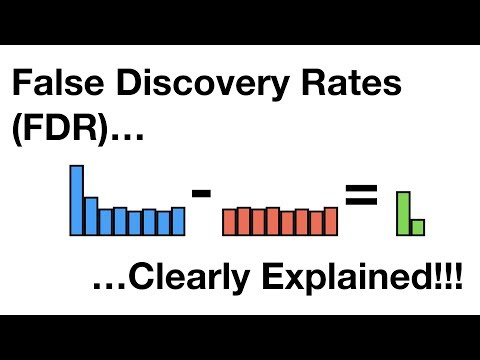

In [62]:
# StatQuest "False Discovery Rates", eng

from IPython.display import YouTubeVideo
YouTubeVideo('K8LQSvtjcEo', width=900, height=500)

## Concluison

In **step 5** we've studied the results of the experiment and checked wether there were any statistically significant diffrences between the groups.  
We figured out that:  

* There are **2484, 2517 and 2537** users in groups A, A and B.
* Difference between test groups **246 and 247** is statistically **insignificant**. We can confirm that all the groups were split properly.
* **We can see that there is no reason to consider the proportions different both between groups 246 - 248 and 247 - 248**. **And both for alpha as 0.05 and 0.0025**  
* **We can see that there is no reason to consider the proportions different both between cpmbined groups 246+247 and group 248**   
**Both for alpha as 0.05 and 0.0025**  

# Conclusion

In this integrated project we've made a thorough work on investigating food startup user behavior. We prepared the data.
Cheked if it was eligible.
 Filtered it from unneded dates.
 Made sure we had users from all 3 experimental groups:
 
* There are **5** events.
* The amount of unique users in original data is: **7551** and in filtered - **7538**
* The average number of events per user is **32**.
* Data covers about 2 weeks. First : 2019-07-25 Last  : 2019-08-08
* By looking at this graph we can definitely say that data represents the **period of 1 week** - from 01-08-2019 till 07-08-2019.
* We can see that we have **2484** and **2517** users in A and A groups respectively and **2537** users in B group.
 
Studied the event funnel:
* We figured the frequency of events.
* We figured how many users have returned and repeated the same behavior more than once. ~84% for payment is a very good number.  
* Right awat by looking at the funnel we can say that most users are left behind right after **Main Screen Appear** behavior and before offers.
* We can see that **~46%** of users got to the Payment stage.

We figured that there are 2 sequences:
* Main Screen Appear >>> Offers Screen Appear >>> CartScreenAppear >>> Payment Screen Successful
* Tutorial

In **step 5** we've studied the results of the experiment and checked wether there were any statistically significant diffrences between the groups.  
We figured out that:  

* There are **2484, 2517 and 2537** users in groups A, A and B.
* Difference between test groups **246 and 247** is statistically **insignificant**. We can confirm that all the groups were split properly.
* **We can see that there is no reason to consider the proportions different both between groups 246 - 248 and 247 - 248**. **And both for alpha as 0.05 and 0.0025**  
* **We can see that there is no reason to consider the proportions different both between cpmbined groups 246+247 and group 248**   
**Both for alpha as 0.05 and 0.0025**  

We've used **The Bonferroni procedure** to correct our alpha and test samples with the new alpha value.

<div class="alert alert-success">
<b>Reviewer's comment v2: </b> Thank you for your researh!
</div>